In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [84]:
data= pd.read_csv("train_V2.csv")

In [85]:
#EXPLORATORY DATA ANALYSIS

data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [86]:
#Details of the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [87]:
data["groupId"].value_counts()
data["matchId"].value_counts()

367f5678d05e38    100
55bd004255b963    100
579b7771f5042e    100
2c905f056c9246    100
44ea80a131c8b3    100
1650fa140d7427    100
f5f605c658b41b    100
edf94392dc8594    100
20398c9b77a1b5    100
4834285f57961b    100
9474979963e502    100
cdf12d64ee4f7c    100
aa2ebdfb282816    100
9ebbba0d60b0ba    100
304b075ee48f54    100
3ea5c65979b762    100
09e60c4572ce47    100
5033c6daa2b4d3    100
140eaf304b9b7a    100
747e360eb8de2d    100
5741cf9d2a82c4    100
2f84536b503e2a    100
71e6e082cafd61    100
7a02900b27bab4    100
279199f4c1d85a    100
c8b692bccc31c3    100
0b5f0e02bbafd8    100
5c95d8ccc8d4a3    100
c608ca9f4ae8e4    100
b3b9d086504a8a    100
                 ... 
e263f4a227313a      8
e3c824e12ff949      8
a97f4f50bd636b      8
f0824159ddaa72      8
45d595cfe121bd      8
378847703cc63b      8
8b696c934c5cfc      8
cf214bd1cc1dda      8
8772c5274a0630      8
9e7dcc7b9a5162      8
9b5eba3473e5f0      8
cedb9e88b4b255      8
bc10cc08f1f56a      7
f491e7a7e2ff47      7
998a86ce7e

In [88]:
data.shape

(4446966, 29)

In [89]:
#Check if the matchID and Group ID has any correlation with the Win Place% as people might get into an easy lobby or 
#might be grouped with a good squad

df=pd.DataFrame()
df[["groupId","matchId", "winPlacePerc"]]= pd.DataFrame(data[["groupId","matchId", "winPlacePerc"]].copy())

#Converting strings to categorical codes
df["groupId"]= df["groupId"].astype('category').cat.codes
df["matchId"]= df["matchId"].astype('category').cat.codes
df["winPlacePerc"]= df["winPlacePerc"].astype('category').cat.codes

#Check Correlation
df.corr()

#The correlation matrix does not show any relation

,groupId,matchId,winPlacePerc
groupId,1.000000,0.000056,0.000408
matchId,0.000056,1.000000,0.000180
winPlacePerc,0.000408,0.000180,1.000000


In [90]:
list(data.columns.values)

['Id',
 'groupId',
 'matchId',
 'assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'matchType',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc']

In [91]:
data=data.drop(data[["Id", "groupId", "matchId"]], axis=1)
data.columns.values

array(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills',
       'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks',
       'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'], dtype=object)

In [92]:
data.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [93]:
#Check the correlation matrix

cor= data.corr()
cor.style.background_gradient().set_precision(2)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1,0.31,0.41,0.3,0.2,0.23,-0.29,0.039,0.32,0.24,0.26,-0.019,-0.15,-0.15,-0.016,0.2,0.11,0.012,0.023,0.0061,0.058,0.29,0.24,0.024,0.3
boosts,0.31,1,0.52,0.36,0.33,0.54,-0.55,0.0083,0.5,0.41,0.42,0.072,-0.014,-0.013,0.023,0.25,0.33,0.035,0.11,0.013,0.087,0.64,0.41,-0.0076,0.63
damageDealt,0.41,0.52,1,0.74,0.61,0.34,-0.68,0.05,0.89,0.7,0.56,-0.0068,-0.041,-0.04,-0.0015,0.26,0.14,0.052,0.037,0.015,0.081,0.4,0.35,0.018,0.44
DBNOs,0.3,0.36,0.74,1,0.47,0.27,-0.56,0.043,0.71,0.65,0.45,-0.014,-0.27,-0.27,-0.0035,0.3,0.1,0.036,0.017,0.069,0.06,0.28,0.22,0.011,0.28
headshotKills,0.2,0.33,0.61,0.47,1,0.2,-0.47,0.024,0.67,0.51,0.45,-0.018,0.0092,0.0094,0.0051,0.15,0.076,0.013,0.029,0.0087,0.039,0.25,0.22,0.005,0.28
heals,0.23,0.54,0.34,0.27,0.2,1,-0.39,-0.0026,0.31,0.27,0.26,0.11,-0.065,-0.064,0.019,0.24,0.3,0.025,0.08,0.035,0.063,0.43,0.31,-0.011,0.43
killPlace,-0.29,-0.55,-0.68,-0.56,-0.47,-0.39,1,-0.023,-0.73,-0.81,-0.54,-0.0058,0.017,0.019,-0.015,-0.27,-0.24,-0.057,-0.089,-0.038,-0.074,-0.59,-0.49,-0.0024,-0.72
killPoints,0.039,0.0083,0.05,0.043,0.024,-0.0026,-0.023,1,0.036,0.037,0.014,-0.1,-0.045,-0.042,-0.98,0.012,-0.029,-0.0042,-0.0046,-0.04,-0.0097,0.0046,-0.004,0.98,0.013
kills,0.32,0.5,0.89,0.71,0.67,0.31,-0.73,0.036,1,0.8,0.6,-0.031,-0.0048,-0.0041,0.0082,0.25,0.11,0.064,0.039,0.018,0.08,0.37,0.34,0.0069,0.42
killStreaks,0.24,0.41,0.7,0.65,0.51,0.27,-0.81,0.037,0.8,1,0.52,-0.035,-0.037,-0.036,0.0034,0.24,0.098,0.066,0.035,0.028,0.064,0.33,0.28,0.0086,0.38


In [182]:
data['WinPlaceBucket'] = np.where(data.winPlacePerc >0.75, 'Quartile1', 
                          np.where(data.winPlacePerc>.5, 'Quartile2', 
                                   np.where(data.winPlacePerc>.25, 'Quartile3', 'Quartile4')))
data[["winPlacePerc","WinPlaceBucket"]]

,winPlacePerc,WinPlaceBucket
0,0.4444,Quartile3
1,0.6400,Quartile2
2,0.7755,Quartile1
3,0.1667,Quartile4
4,0.1875,Quartile4
5,0.0370,Quartile4
6,0.0000,Quartile4
7,0.7368,Quartile2
8,0.3704,Quartile3
9,0.2143,Quartile4


c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


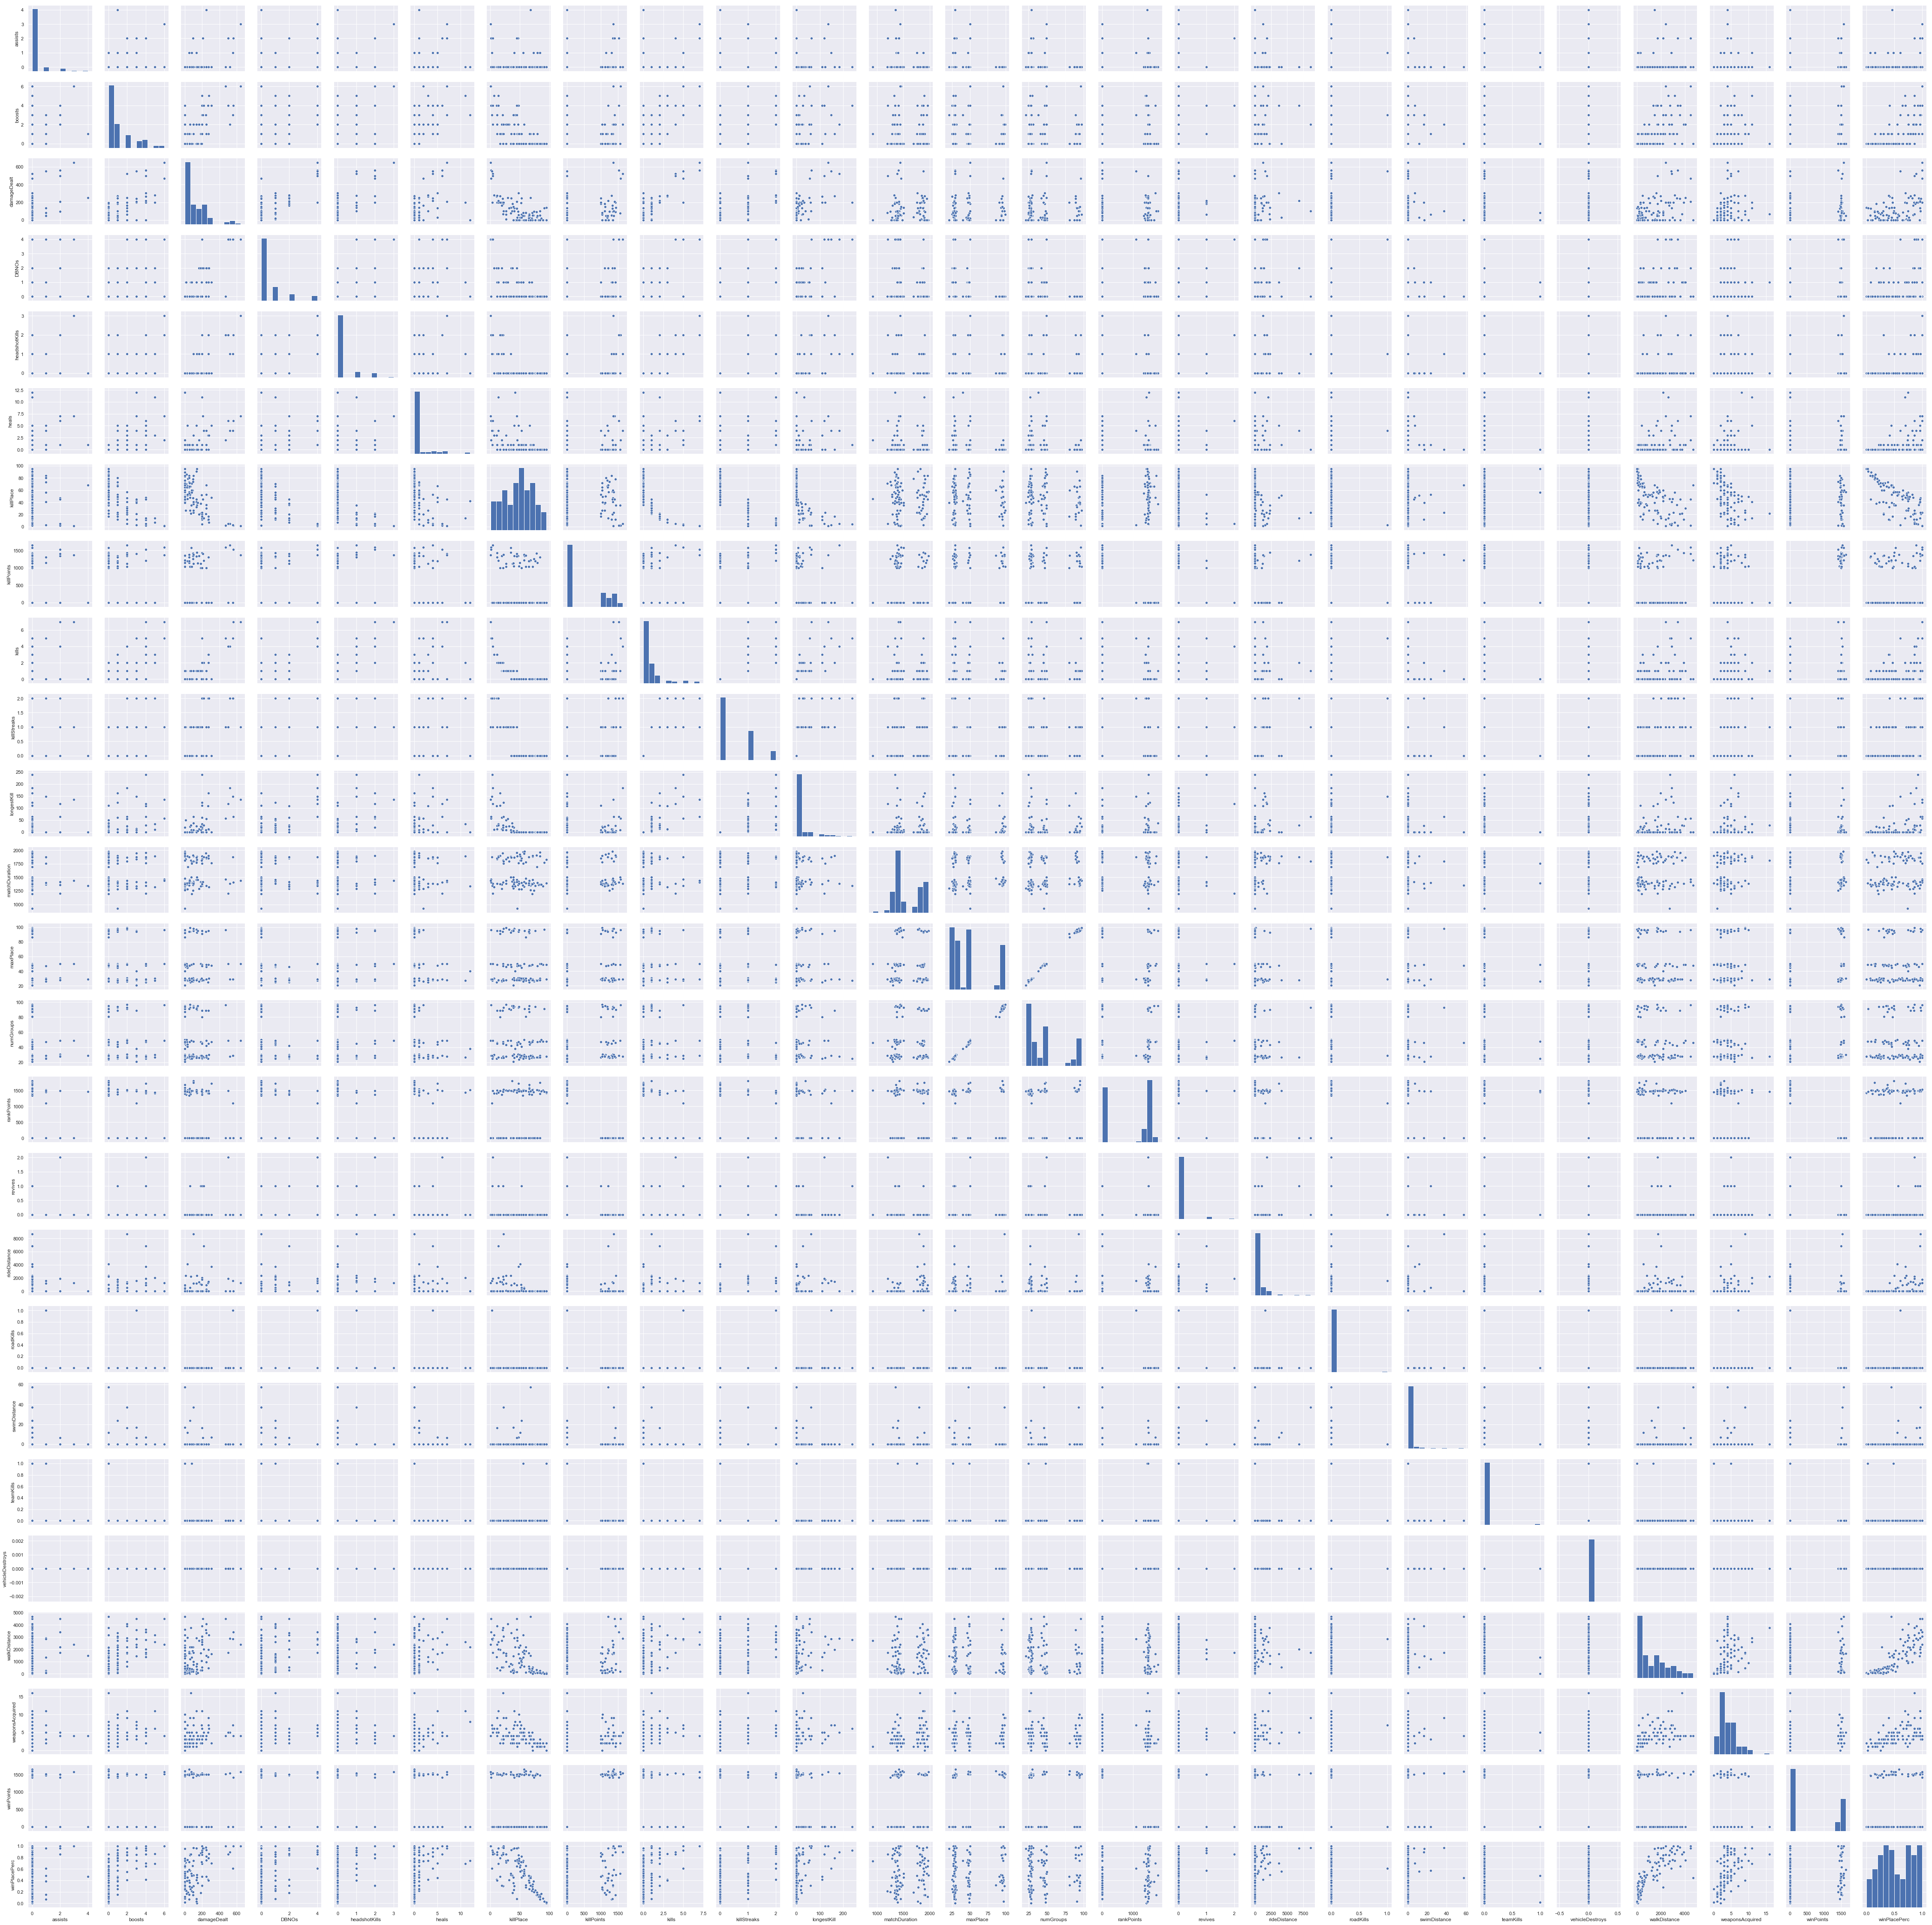

In [146]:
import seaborn as sns
sns.set()
sns.pairplot(data.sample(100), size = 2.5) #hue="WinPlaceBucket")

In [183]:
data.columns.values

array(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills',
       'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks',
       'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'bucket',
       'WinPlaceBucket'], dtype=object)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


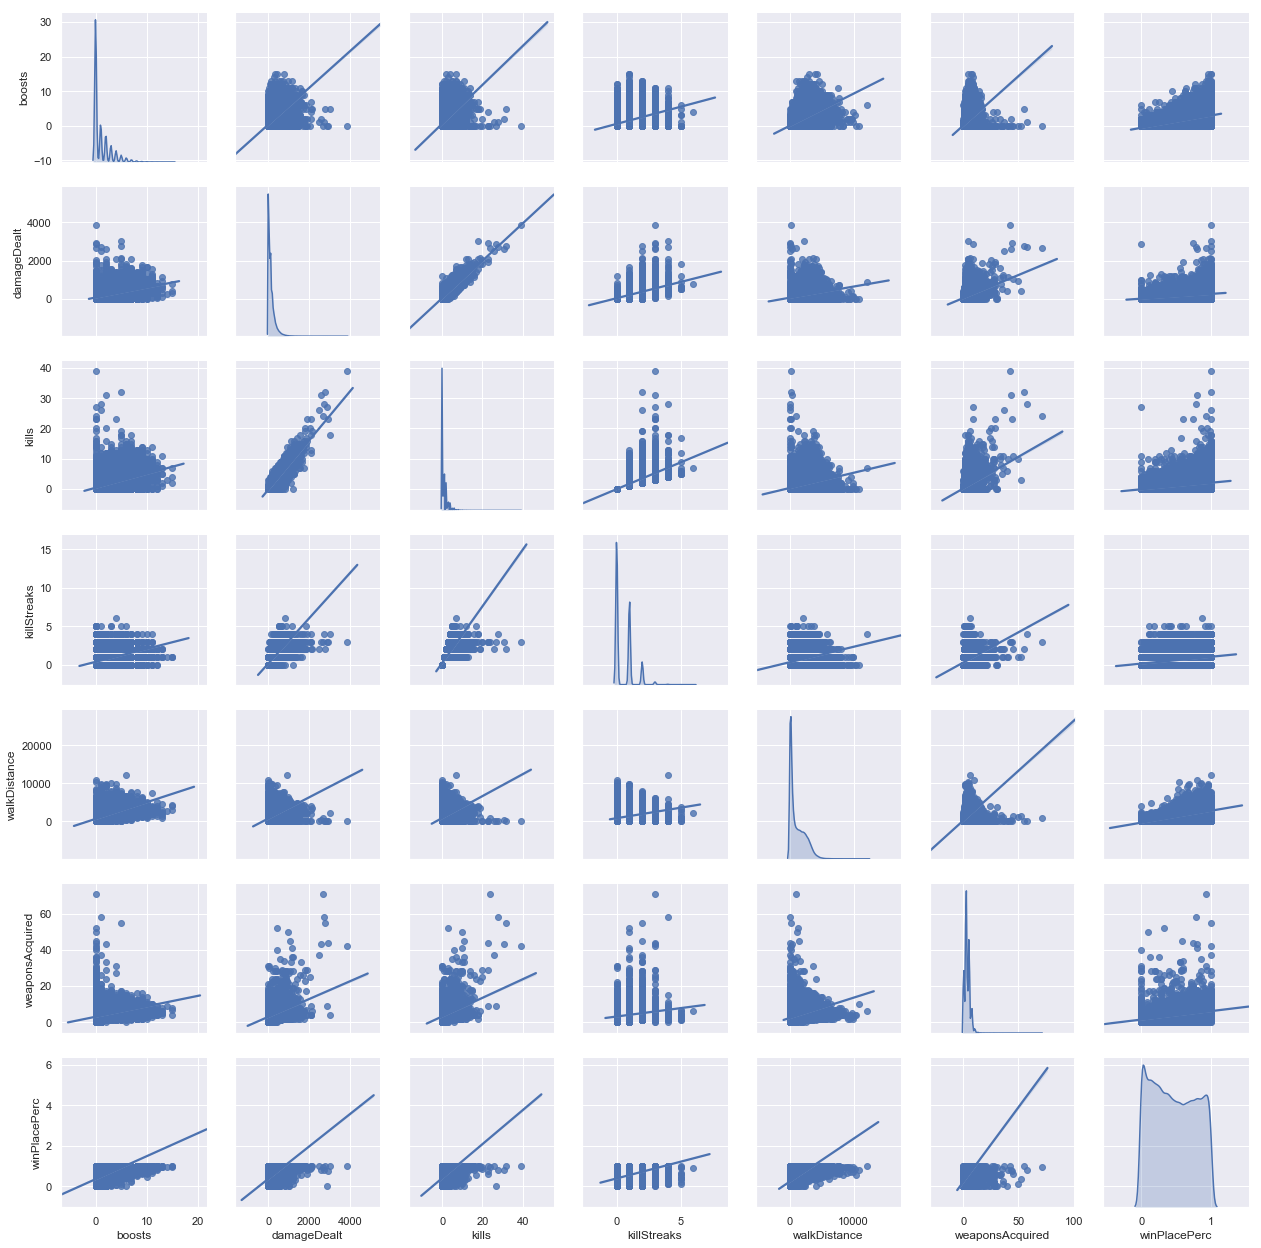

In [169]:
#We checked the correlation matrix above
#Using scatter plot for the variables correlated with Winning Percentage
#Note: Correlation is not causation

import seaborn as sns
sns.set()
col=["boosts", "damageDealt", "kills", "killStreaks", "walkDistance", "weaponsAcquired","winPlacePerc"]
sns.pairplot(data[col].sample(100000), size = 2.5, kind="reg", diag_kind="kde")

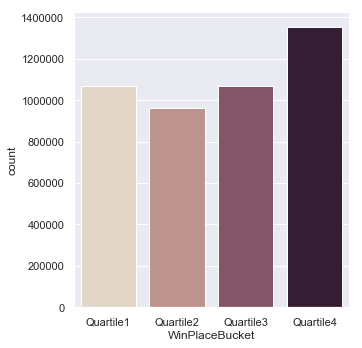

In [208]:
sns.catplot(x="WinPlaceBucket", kind="count", palette="ch:.25", data=data.sort_values("WinPlaceBucket"))

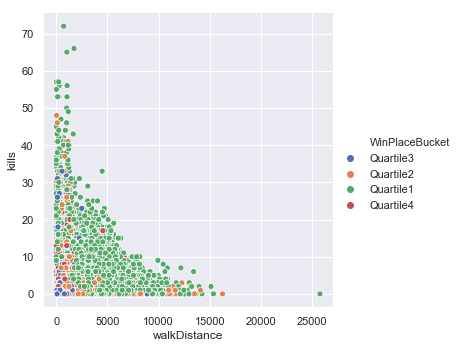

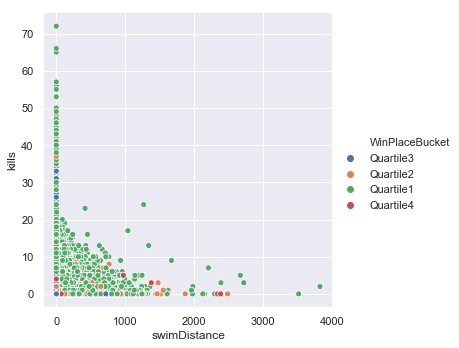

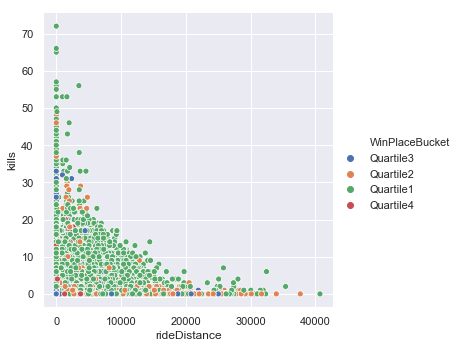

In [201]:

sns.relplot(x="walkDistance", y="kills", hue="WinPlaceBucket", data=data)
sns.relplot(x="swimDistance", y="kills", hue="WinPlaceBucket", data=data)
sns.relplot(x="rideDistance", y="kills", hue="WinPlaceBucket", data=data)

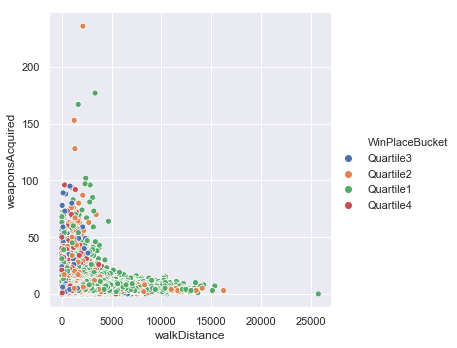

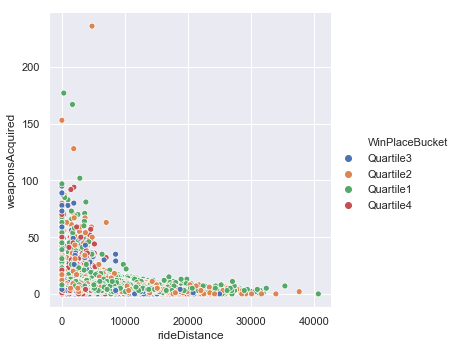

In [200]:
sns.relplot(x="walkDistance", y="weaponsAcquired", hue="WinPlaceBucket", data=data)
sns.relplot(x="rideDistance", y="weaponsAcquired", hue="WinPlaceBucket", data=data)

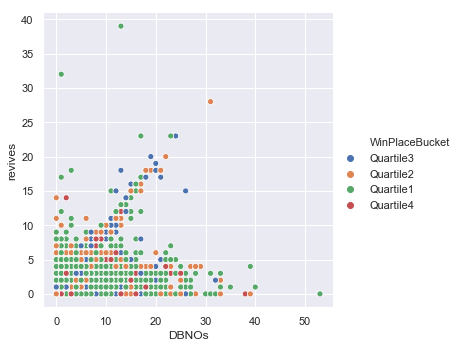

In [203]:
sns.relplot(x="DBNOs", y="weaponsAcquired", hue="WinPlaceBucket", data=data)

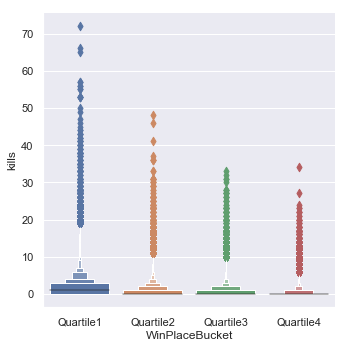

In [210]:
sns.catplot(x="WinPlaceBucket", y="kills", kind="boxen",
            data=data.sort_values("WinPlaceBucket"))

In [214]:
#data.columns.values
data["matchType"].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

In [ ]:
sns.catplot(x="matchType", y="kills", hue="WinPlaceBucket", kind="swarm", data=data)